In [121]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.convnext import ConvNeXtXLarge
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]
# IMAGE_SIZE = [384, 384]


In [31]:
!unzip /content/Facial_Emotion_Recognition_Dataset.zip

Archive:  /content/Facial_Emotion_Recognition_Dataset.zip
replace README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [99]:
train_path = '/content/train'
valid_path = '/content/test'

In [122]:
# vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

conv = ConvNeXtXLarge(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [123]:
# for layer in vgg.layers:
#   layer.trainable = False

for layer in conv.layers:
  layer.trainable = False

In [102]:
  # useful for getting number of classes
folders = glob('/content/train/*')

In [124]:
# our layers - you can add more if you want
# x = Flatten()(vgg.output)
x = Flatten()(conv.output)

# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [125]:
# create a model object
# model = Model(inputs=vgg.input, outputs=prediction)
model = Model(inputs=conv.input, outputs=prediction)


In [126]:
# view the structure of the model
model.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_prestem_… │ (None, 224, 224, 3)    │              0 │ input_layer_12[0][0]   │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stem      │ (None, 56, 56, 256)    │         13,056 │ convnext_xlarge_prest… │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 56, 56, 256)    │         12,800 │ convnext_xlarge_stem[… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 56, 56, 256)    │            512 │ convnext_xlarge_stage… │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 56, 56, 1024)   │        263,168 │ convnext_xlarge_stage… │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 56, 56, 1024)   │              0 │ convnext_xlarge_stage… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 56, 56, 256)    │        262,400 │ convnext_xlarge_stage… │
│ (Dense)                   │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 56, 56, 256)    │            256 │ convnext_xlarge_stage… │
│ (LayerScale)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 56, 56, 256)    │              0 │ convnext_xlarge_stage… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_72 (Add)              │ (None, 56, 56, 256)    │              0 │ convnext_xlarge_stem[… │
│                           │                        │                │ convnext_xlarge_stage… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 56, 56, 256)    │         12,800 │ add_72[0][0]           │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ convnext_xlarge_stage_0_… │ (None, 56, 56, 256)    │            512 │ convnext_xlarge_stage… │
│ (LayerNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 348,950,792 (1.30 GB)

 Trainable params: 802,824 (3.06 MB)

 Non-trainable params: 348,147,968 (1.30 GB)

In [127]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [107]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [128]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [129]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [130]:
training_set = train_datagen.flow_from_directory('/content/train',
                                                 target_size = (224, 224),
                                                #  target_size = (384, 384),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 112 images belonging to 8 classes.


In [131]:
test_set = test_datagen.flow_from_directory('/content/test',
                                            target_size = (224, 224),
                                            # target_size = (384, 384),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 40 images belonging to 8 classes.


In [132]:
'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model
# r = model.fit(
#   training_set,
#   validation_data=test_set,
#   epochs=5,
#   steps_per_epoch=len(training_set),
#   validation_steps=len(test_set)
# )

from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  callbacks=[early_stopping],
  steps_per_epoch=len(training_set),
)


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 69s 9s/step - accuracy: 0.0757 - loss: 20.2970 - val_accuracy: 0.1250 - val_loss: 36.0035
Epoch 2/30


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1250 - val_loss: 36.0035
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.1739 - loss: 34.9849 - val_accuracy: 0.1500 - val_loss: 10.9639
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 819ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1500 - val_loss: 10.9639
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.1487 - loss: 13.6527 - val_accuracy: 0.1250 - val_loss: 15.8930
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 866ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1250 - val_loss: 15.8930


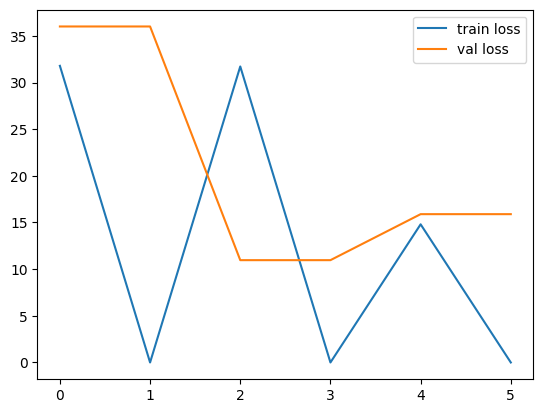

<Figure size 640x480 with 0 Axes>

In [133]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


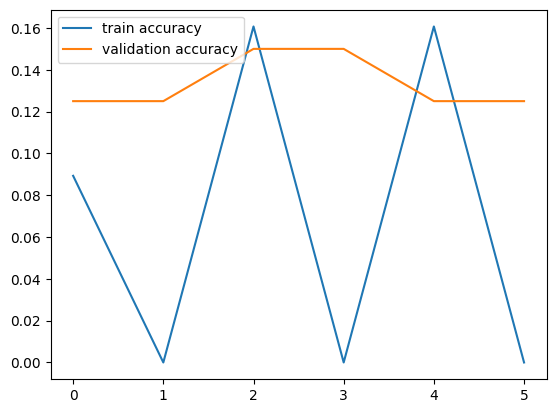

<Figure size 640x480 with 0 Axes>

In [134]:
# # accuracies
# plt.plot(r.history['acc'], label='train acc')
# plt.plot(r.history['val_acc'], label='val acc')
# plt.legend()
# plt.show()
# plt.savefig('AccVal_acc')

# accuracies
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [135]:
import tensorflow as tf

from keras.models import load_model

In [136]:
model.save('facefeatures_new_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class: happy


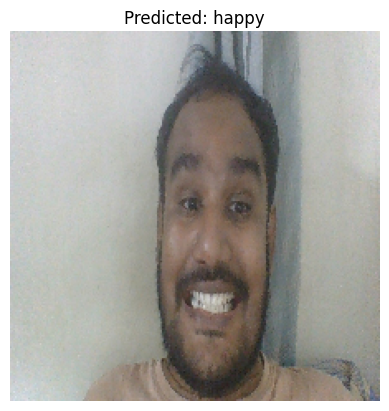

In [138]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.vgg16 import preprocess_input

# Load and preprocess the image
img_path = '/content/train/happy/Happy_10.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make the prediction
predictions = model.predict(img_array)

# Get the index of the highest probability
predicted_class = np.argmax(predictions, axis=1)

# Assuming your class names are stored in 'folders' like before
class_names = [f.split('/')[-1] for f in folders]

# Print the predicted class name
predicted_label = class_names[predicted_class[0]]
print(f"Predicted class: {predicted_label}")

# Display the image along with the predicted label
plt.imshow(image.load_img(img_path, target_size=(224, 224)))
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')  # Hide axis
plt.show()
